1. Exploratory Data Analysis

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix



In [2]:
font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#00A5E0', '#DD403A']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

random_state = 42
scoring_metric = 'recall'
comparison_dict, comparison_test_dict = {}, {}


In [3]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = train_df.copy()
    df_func['Exited'] = df_func['Exited'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Retained', 'Churned'])

    plt.tight_layout();



In [4]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Exited',
                  data=train_df,
                  palette=colors,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Exited',
                data=train_df,
                palette=colors_cat,
                ax=ax2)
    ax2.set_ylabel('Churn rate')

    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticklabels(['No', 'Yes'])

    plt.tight_layout();

In [5]:
data = pd.read_csv("D:\MidTerm-20230503T034423Z-001\churn.csv")
df = data.copy()
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

C:\Users\VNPT10\AppData\Local\Temp\ipykernel_6072\2548221358.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

2. Data Preprocessing

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

3. Data Visualization

#Phân bổ tỉ lệ rời bỏ của khách hàng

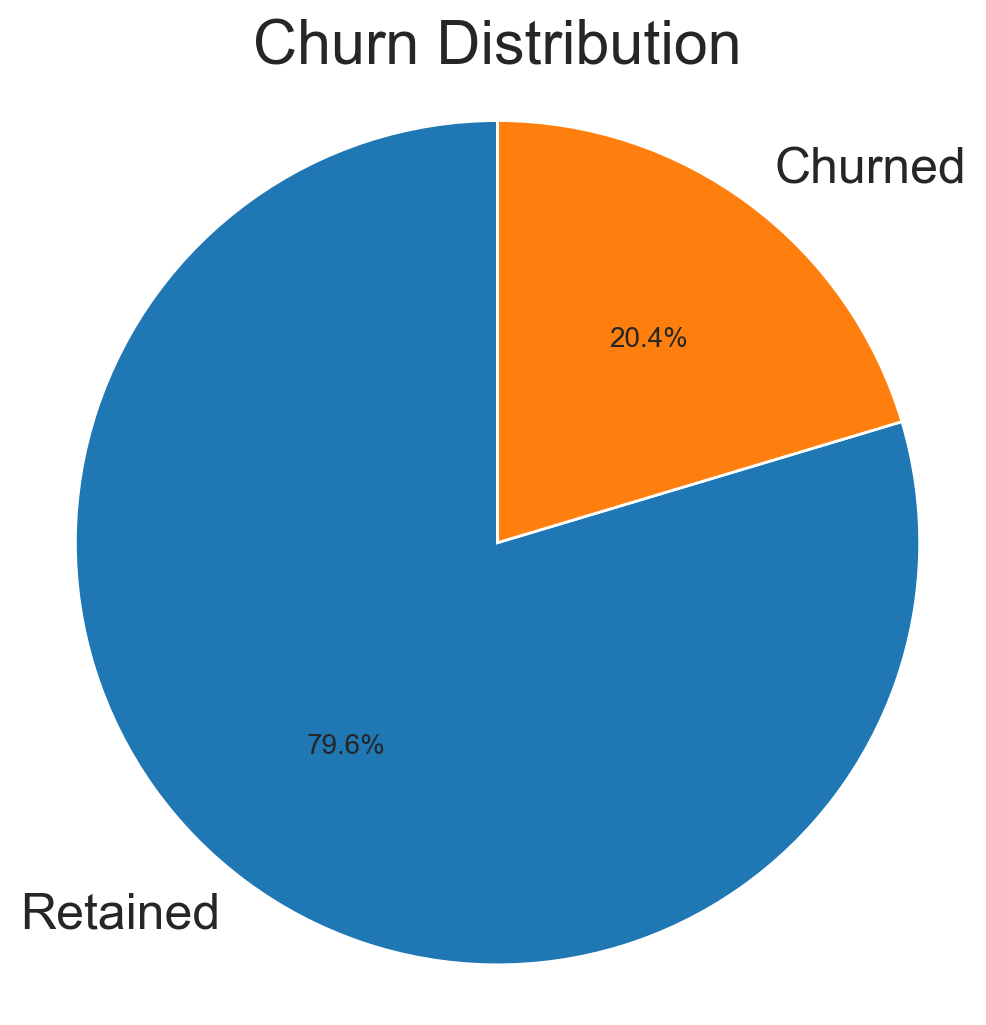

In [11]:
plt.figure(figsize=(6, 6))
churn_counts = data['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

In [12]:
churn_counts = data['Exited'].value_counts()
churn_counts

0    7963
1    2037
Name: Exited, dtype: int64

#Chia dữ liệu thành hai tập Continuous, Categorical 

In [13]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary
Categorical:  Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember


In [14]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

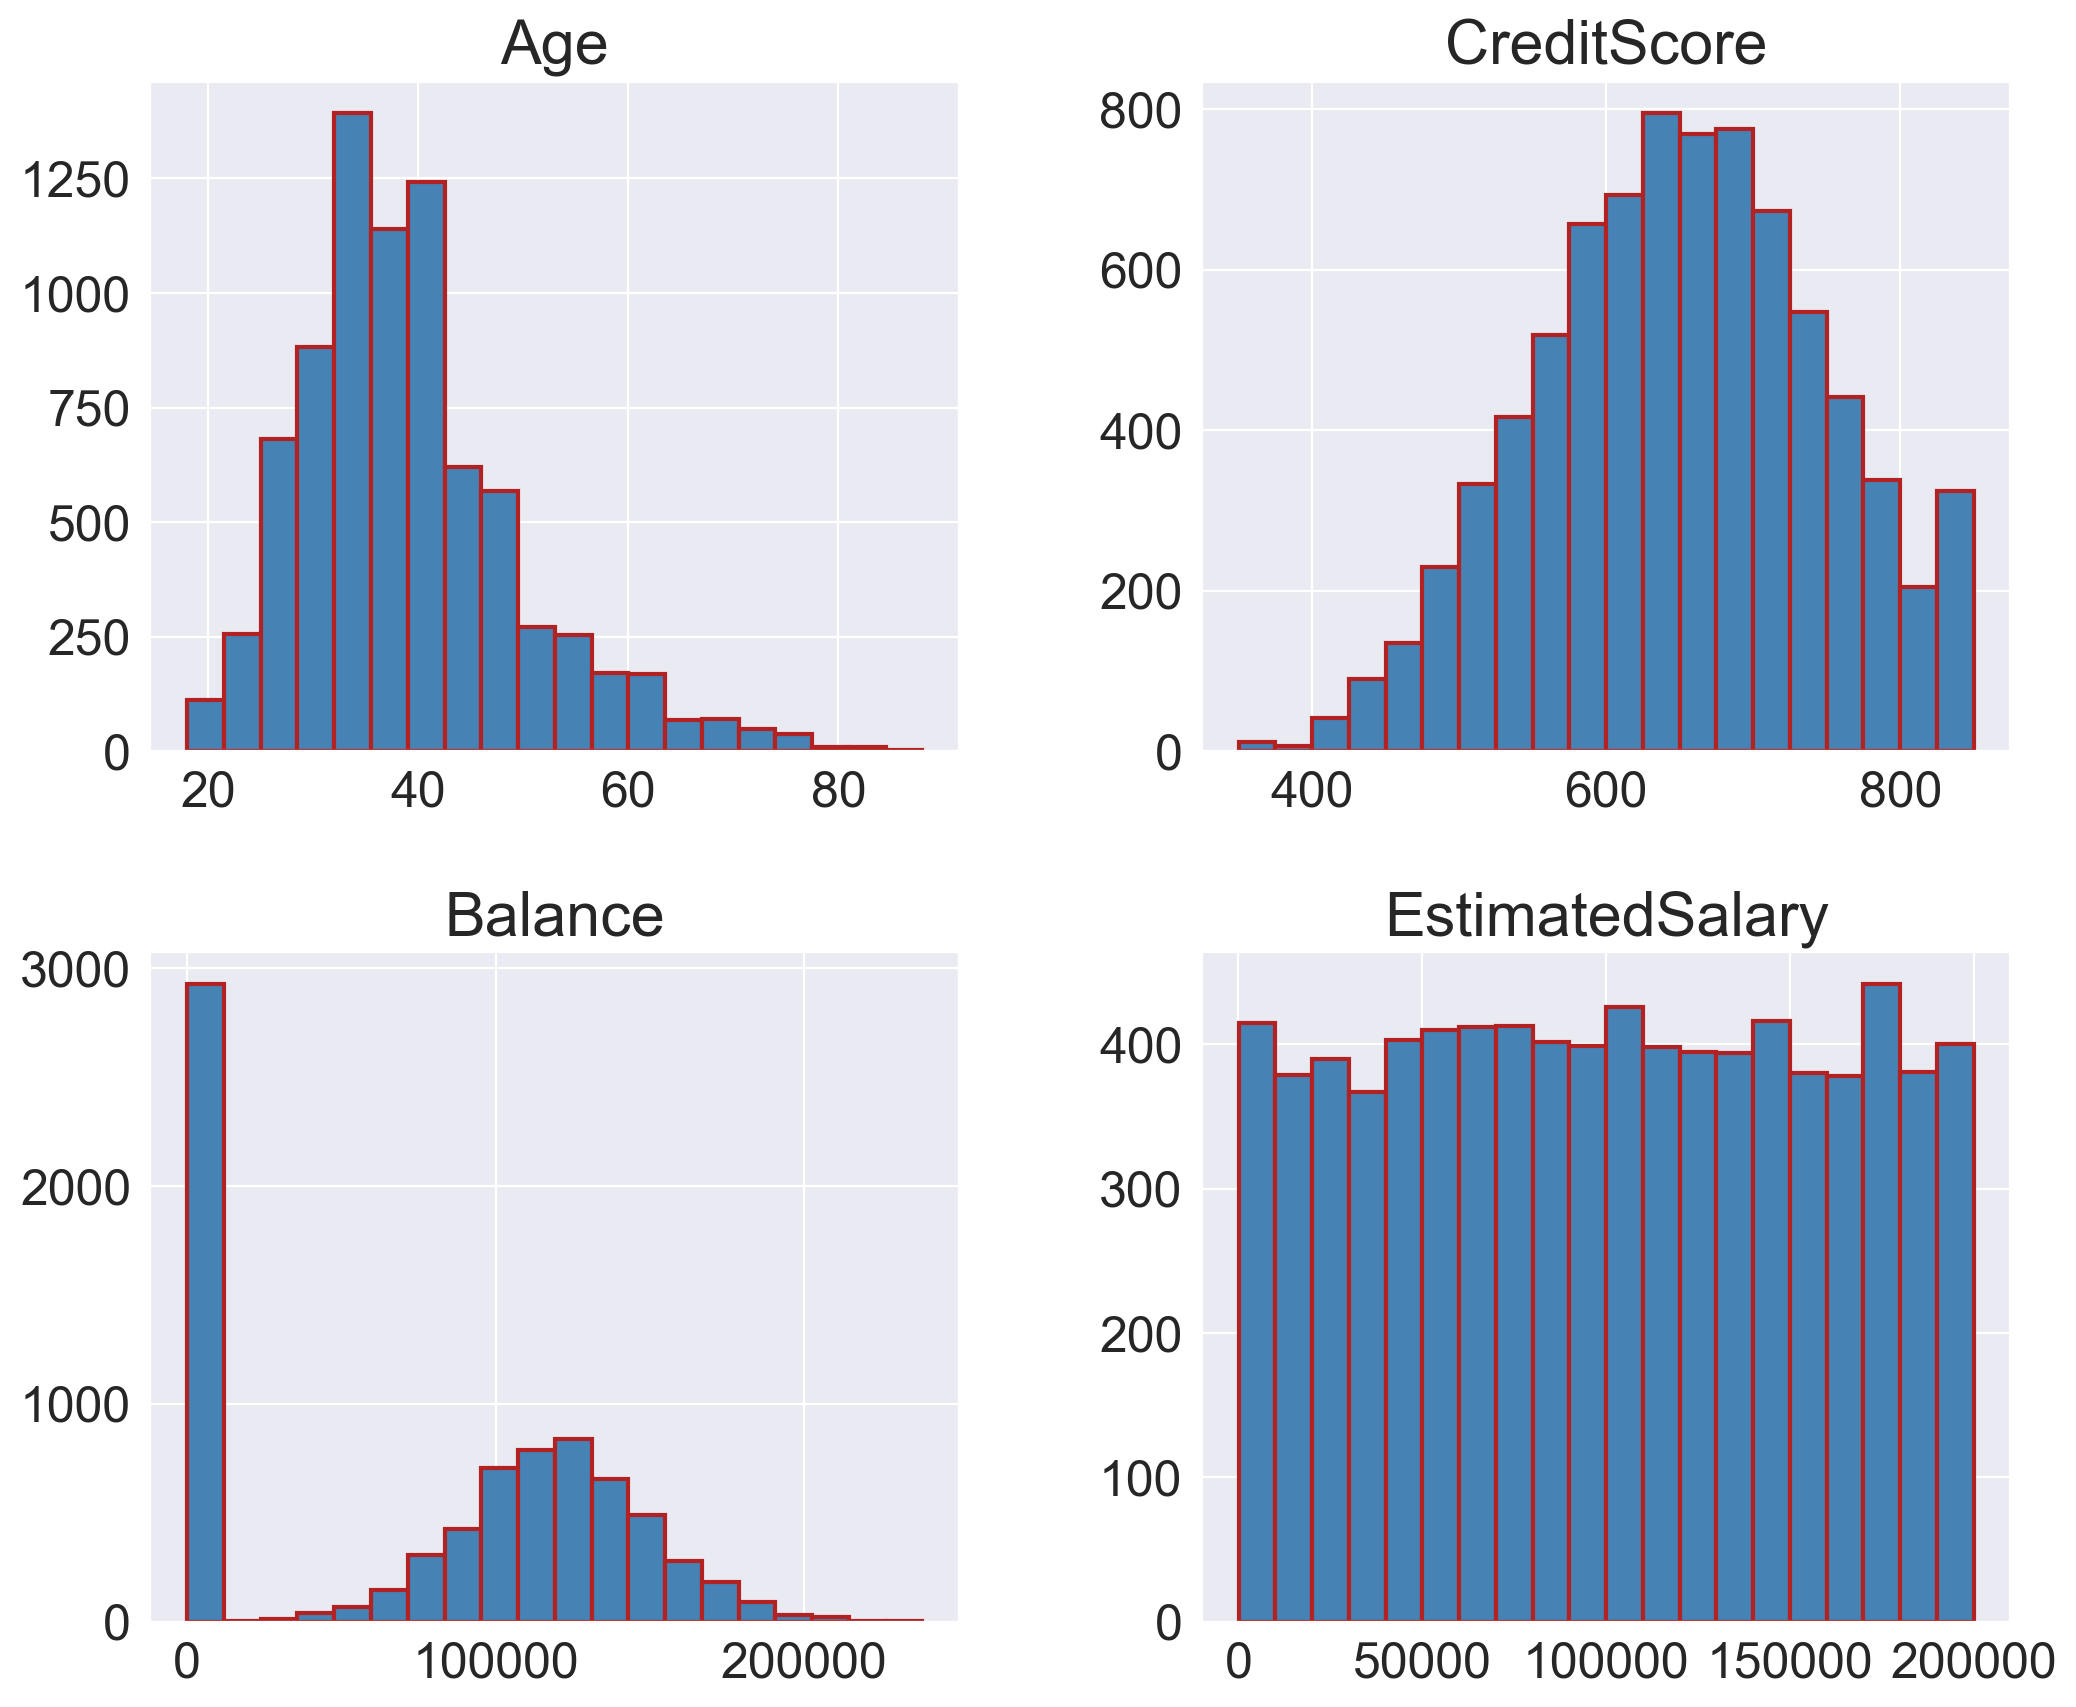

In [15]:
#Số lượng rời bỏ của khách hàng với mỗi thuộc tính của tập Continuous
train_df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

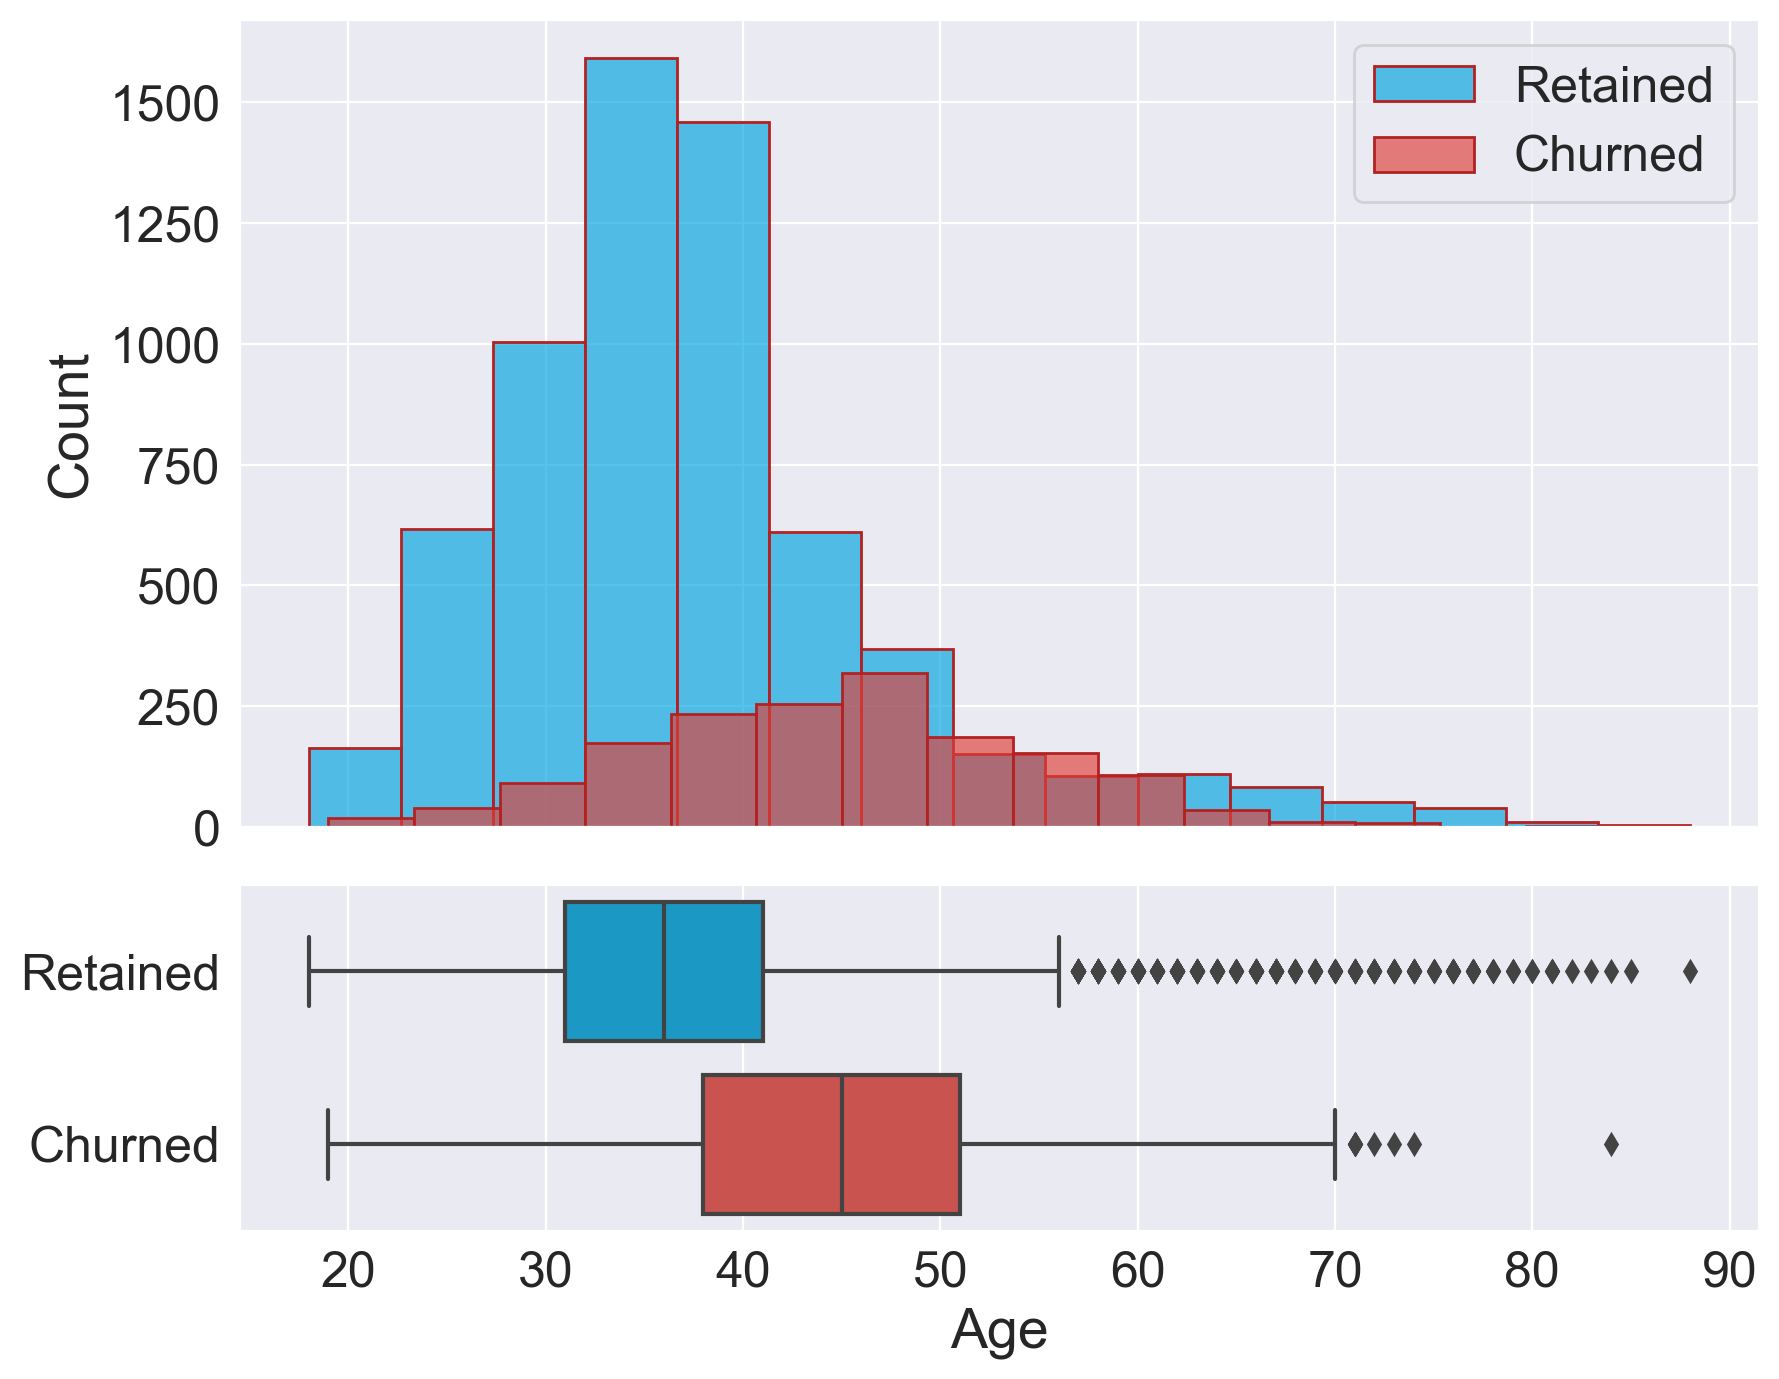

In [16]:
#Biểu đổ + boxplot biểu hiện sự rời bỏ của khách hàng ứng với mỗi độ tuổi
df_churned = train_df[train_df['Exited'] == 1]
df_retained = train_df[train_df['Exited'] == 0]

plot_continuous('Age')

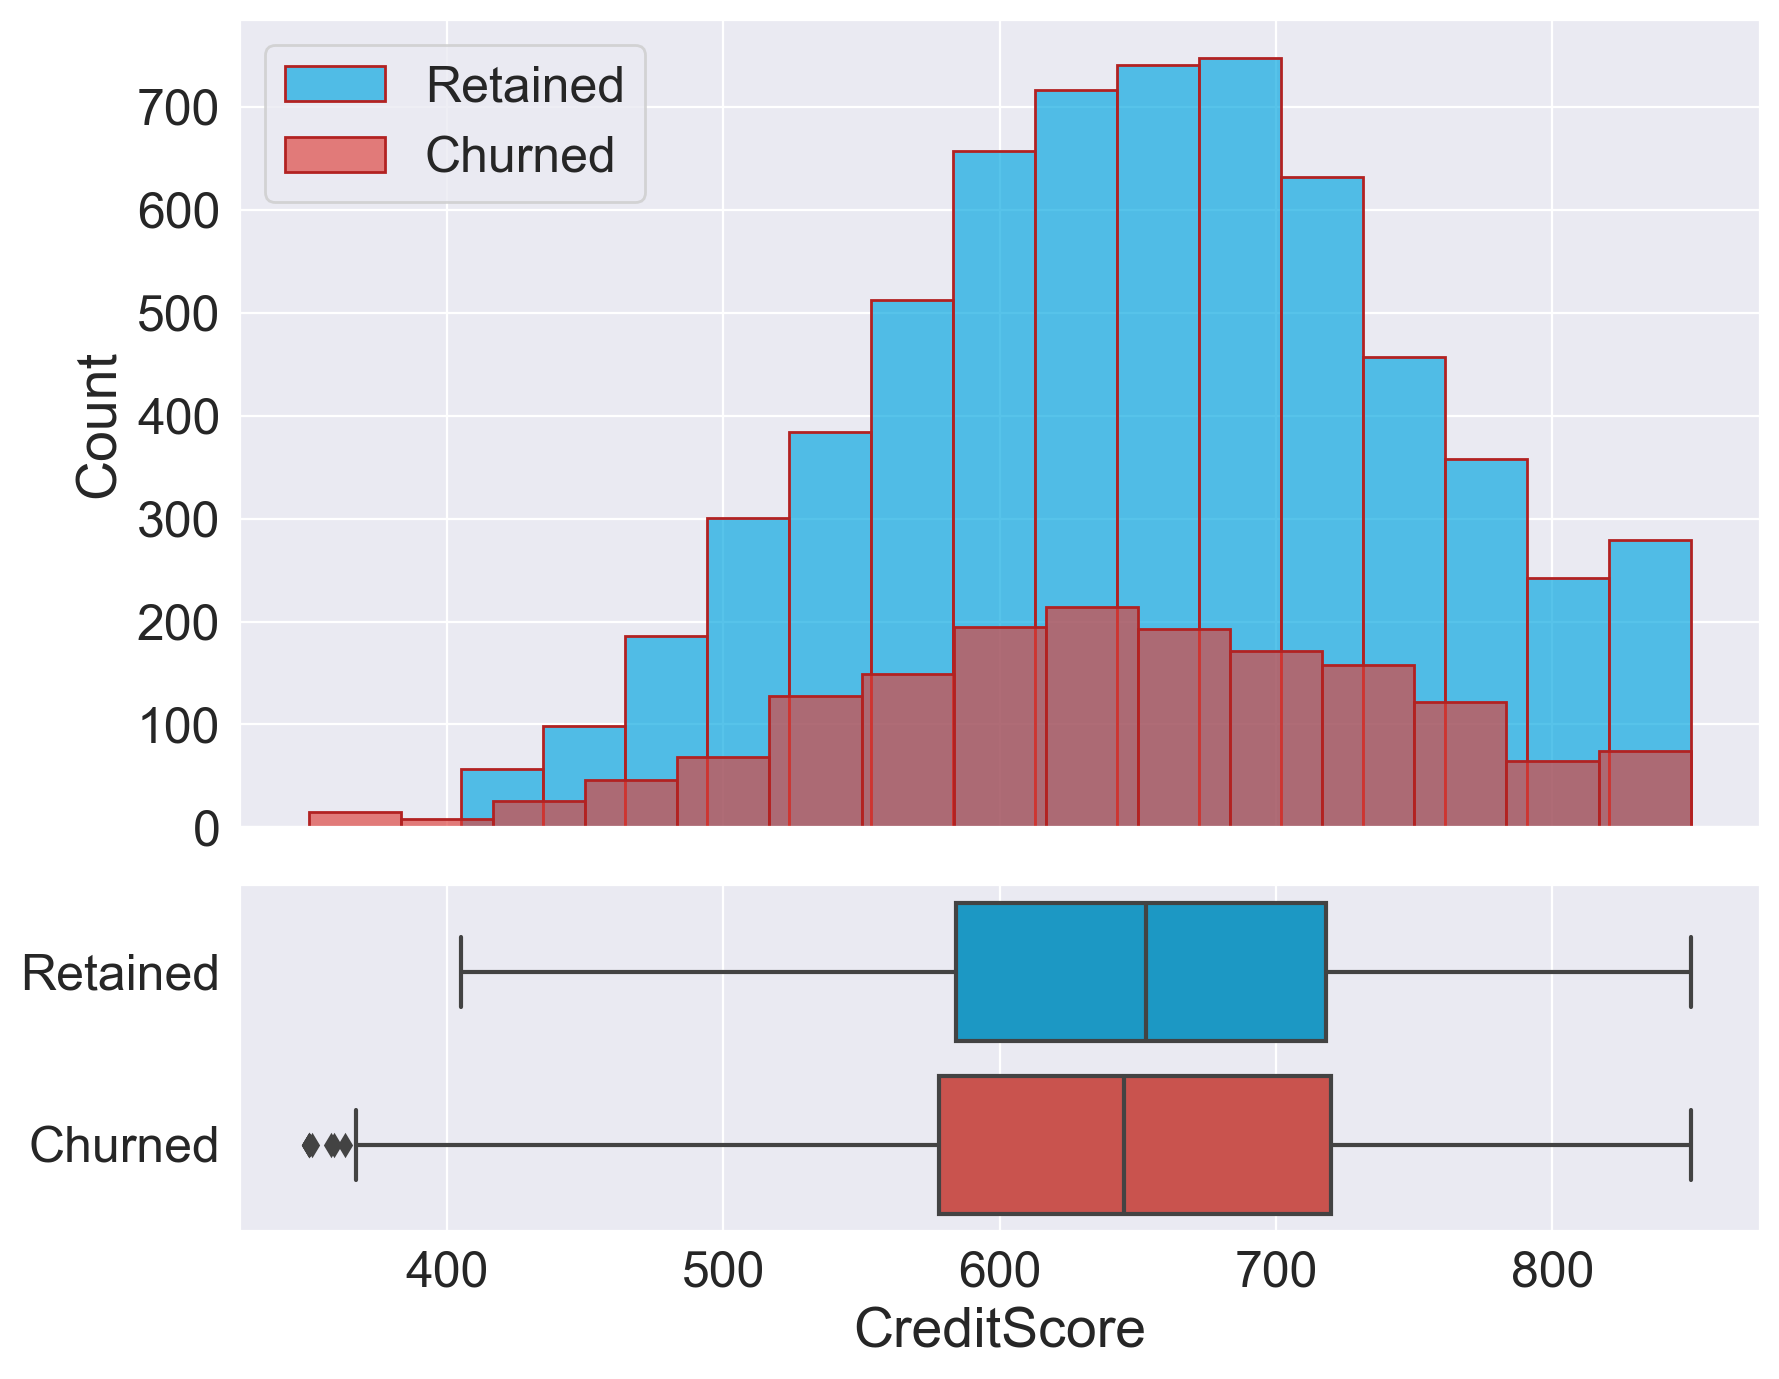

In [17]:
#Biểu đổ + boxplot biểu hiện sự rời bỏ của khách hàng ứng với điểm tín dụng
plot_continuous('CreditScore')

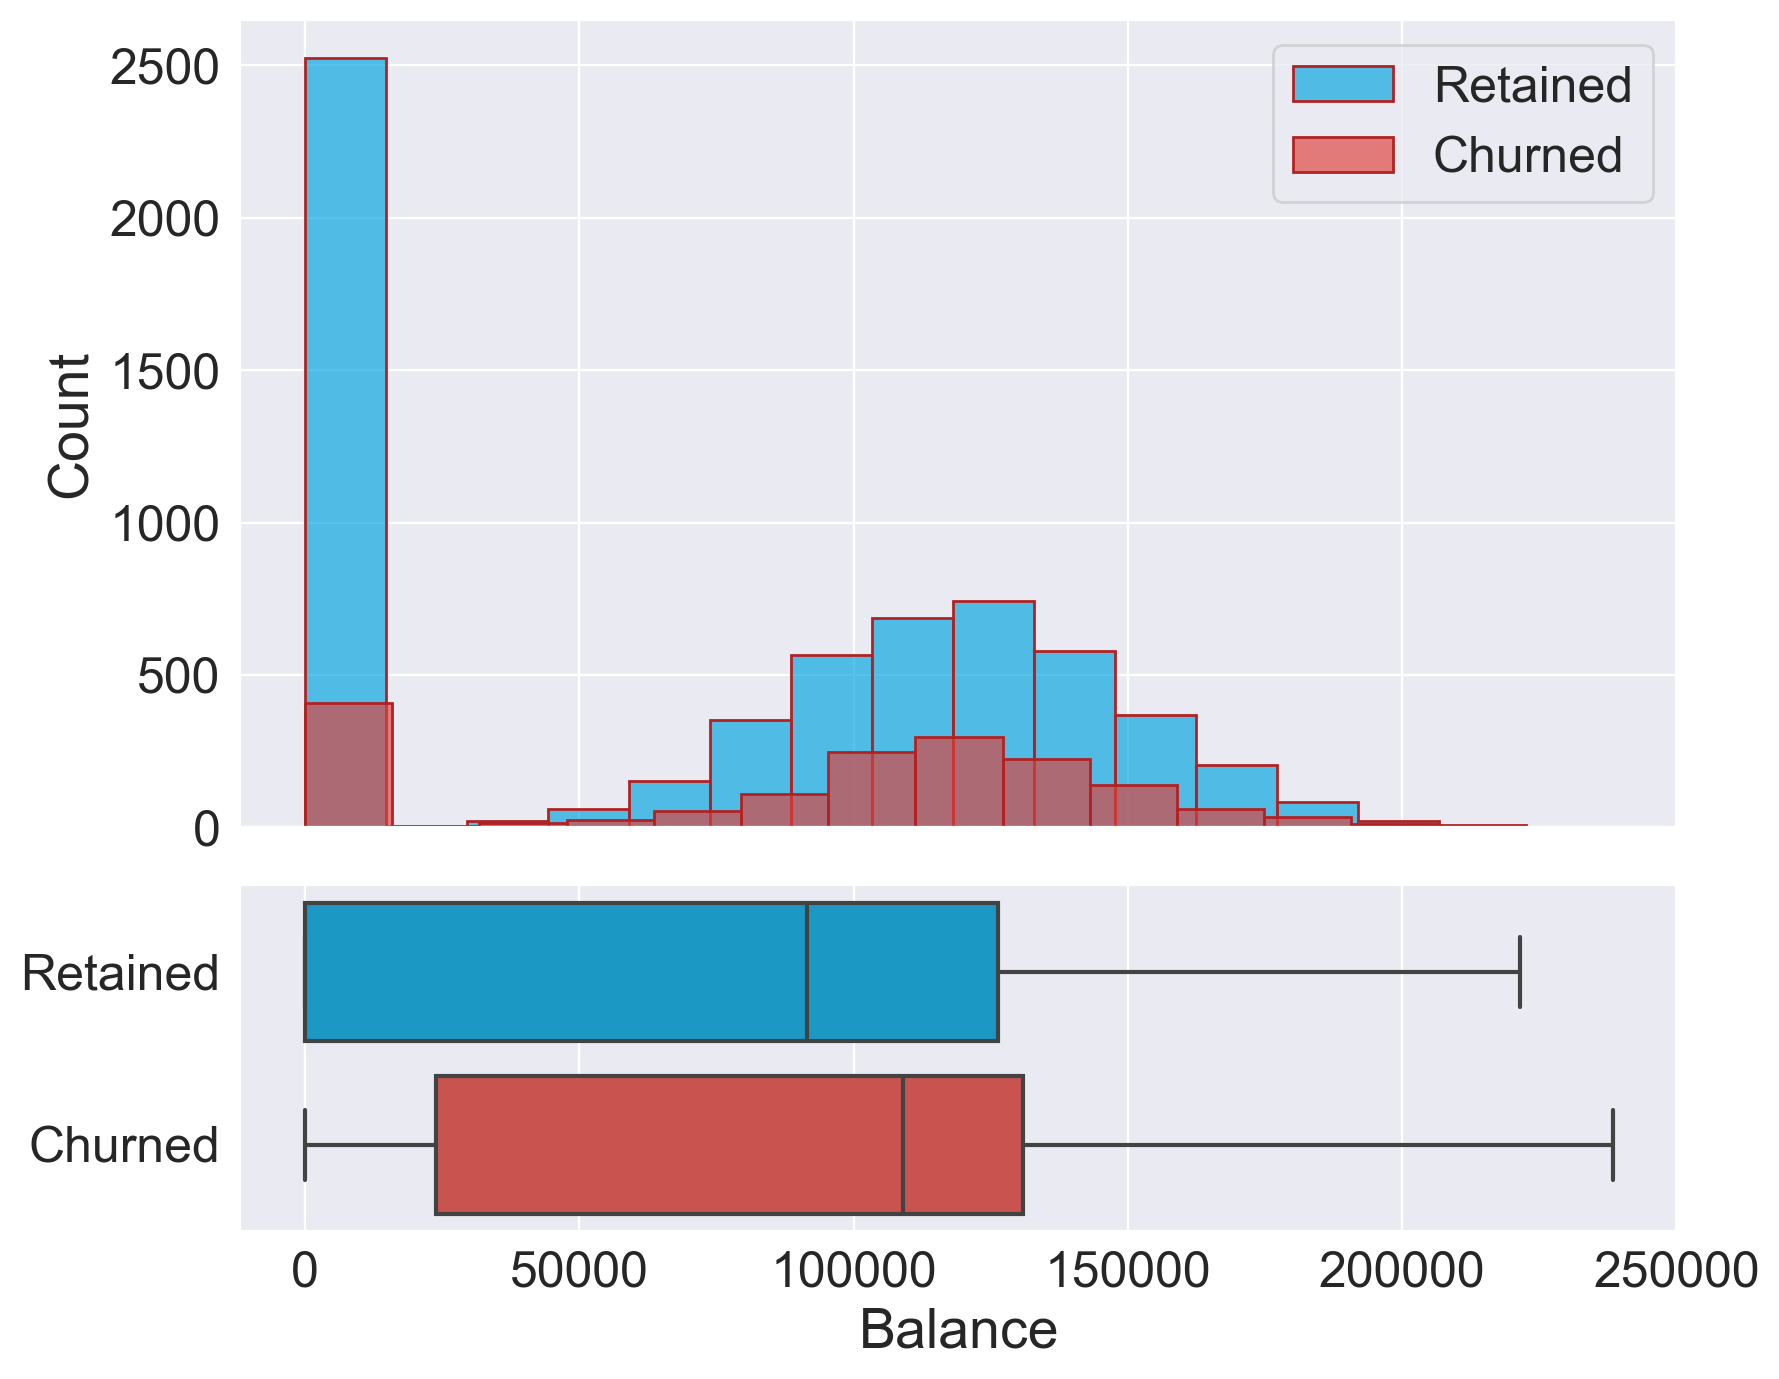

In [18]:
#Biểu đổ + boxplot biểu hiện sự rời bỏ của khách hàng ứng với số dư trong tài khoản
plot_continuous('Balance')

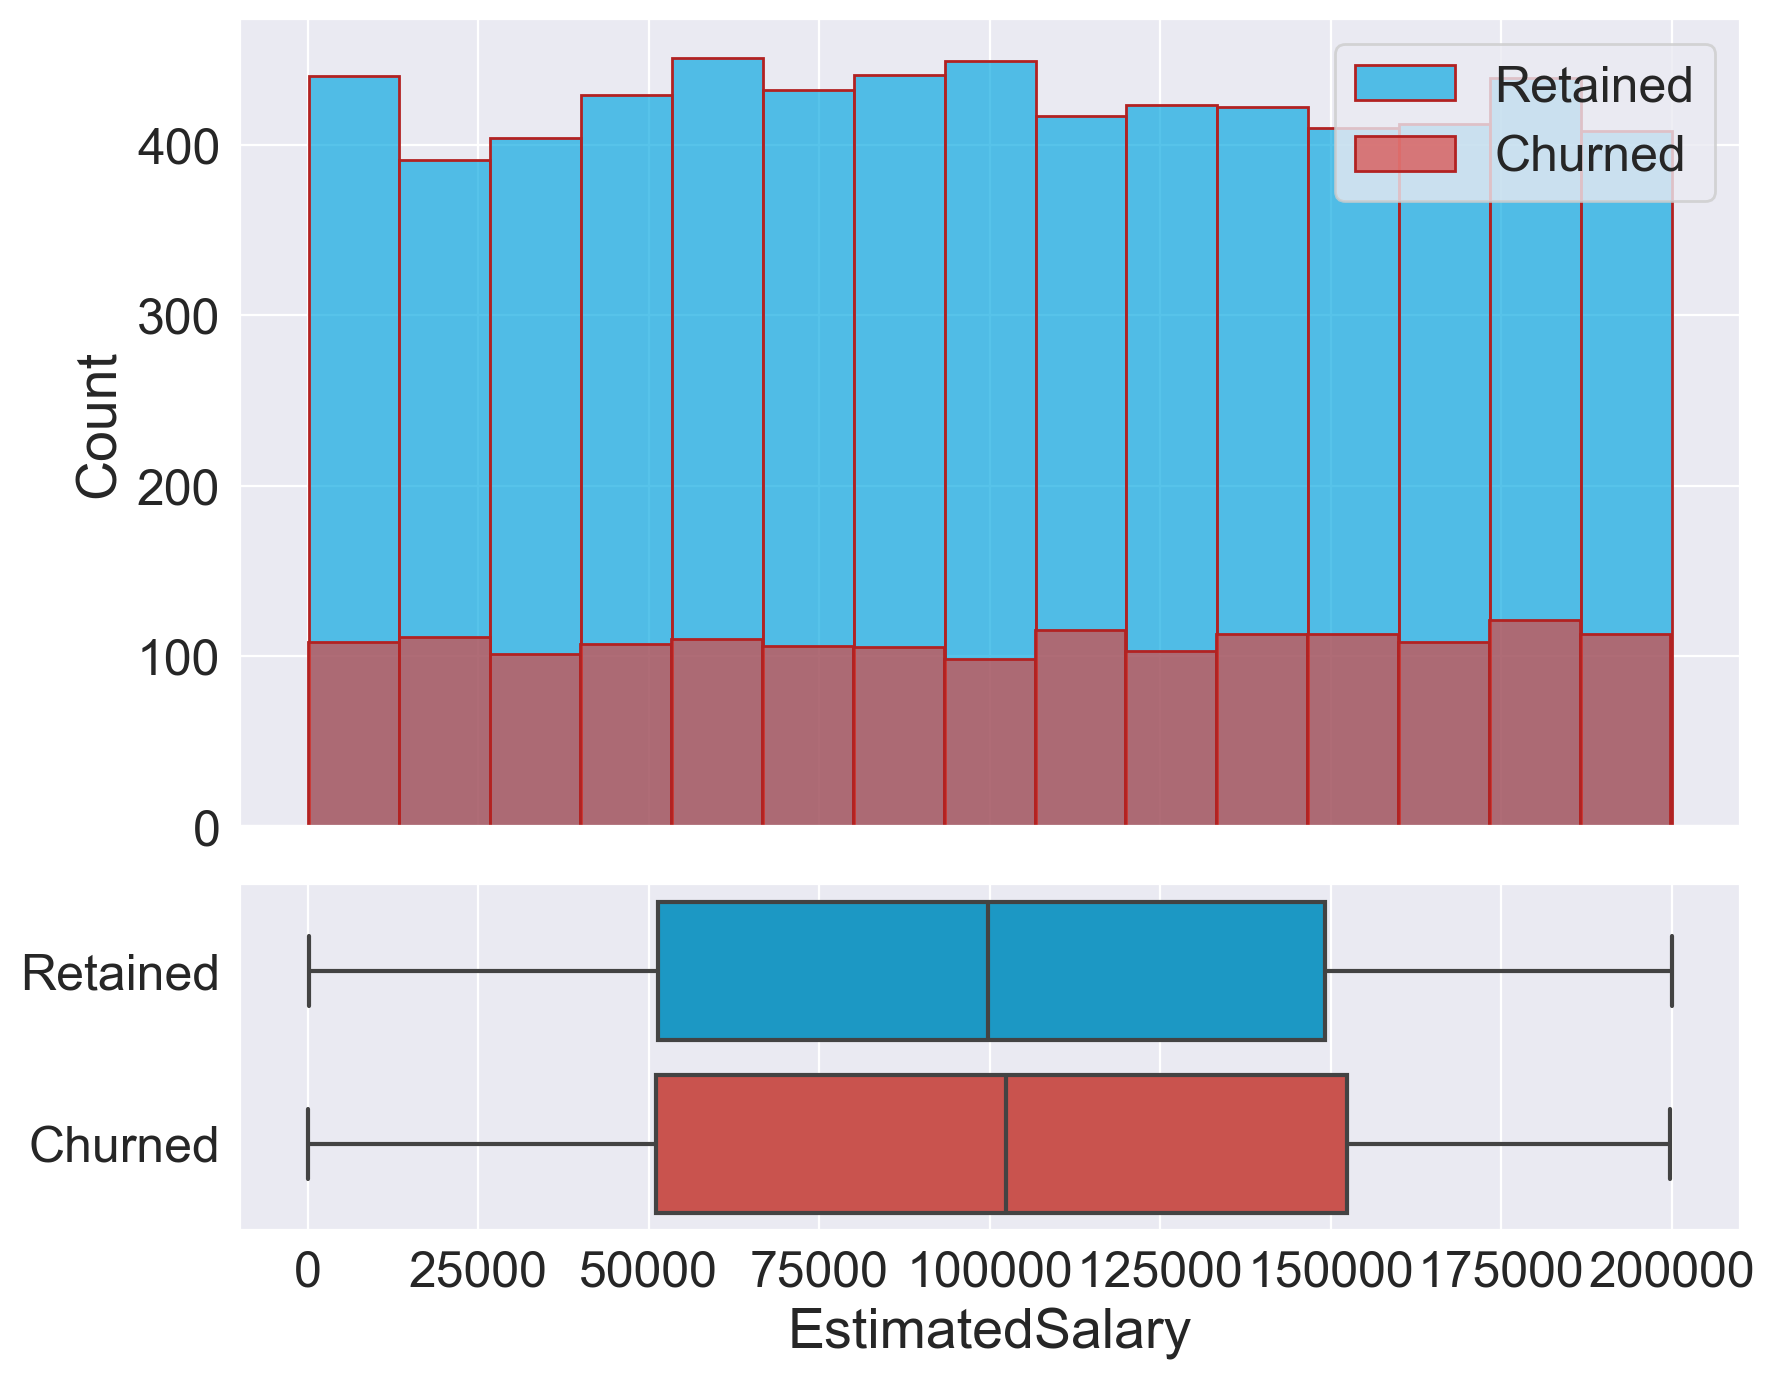

In [19]:
#Biểu đổ + boxplot biểu hiện sự rời bỏ của khách hàng ứng với lương dự đoán của khách hàng
plot_continuous('EstimatedSalary')

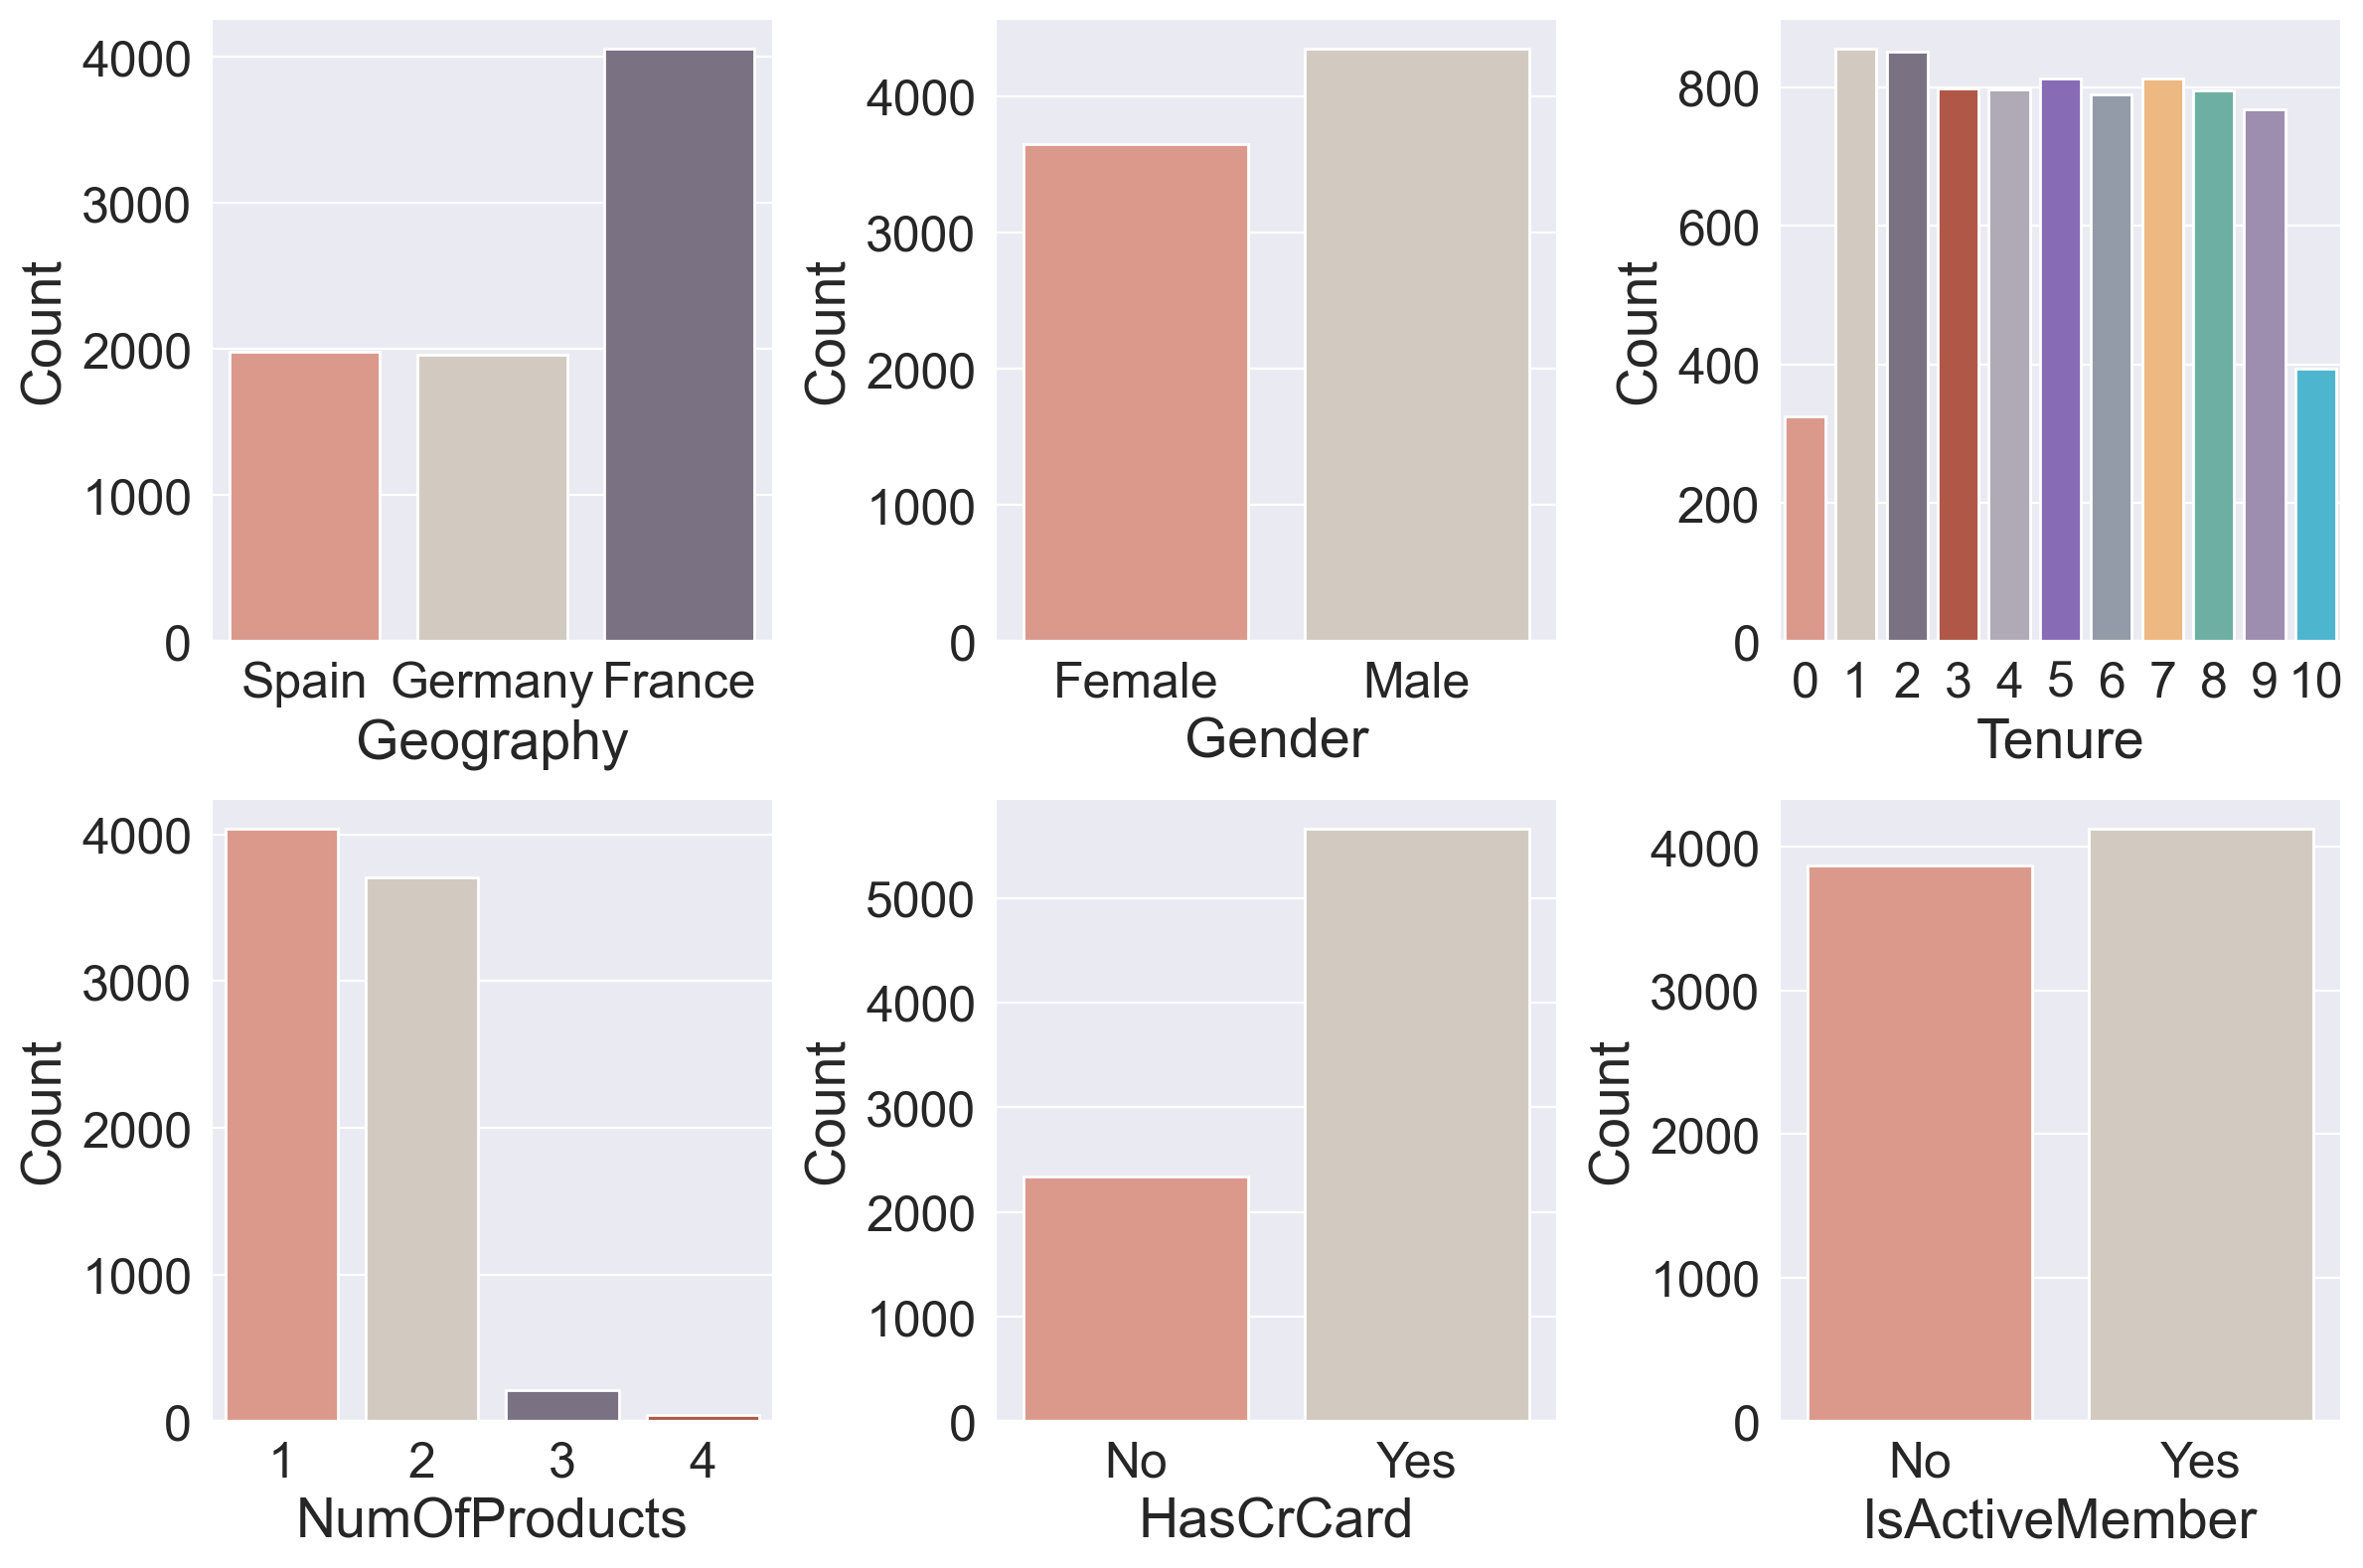

In [20]:
#Đối với tập Categorical
df_cat = train_df[categorical]

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 3, index + 1)
    sns.countplot(x=column, data=train_df, palette=colors_cat)

    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

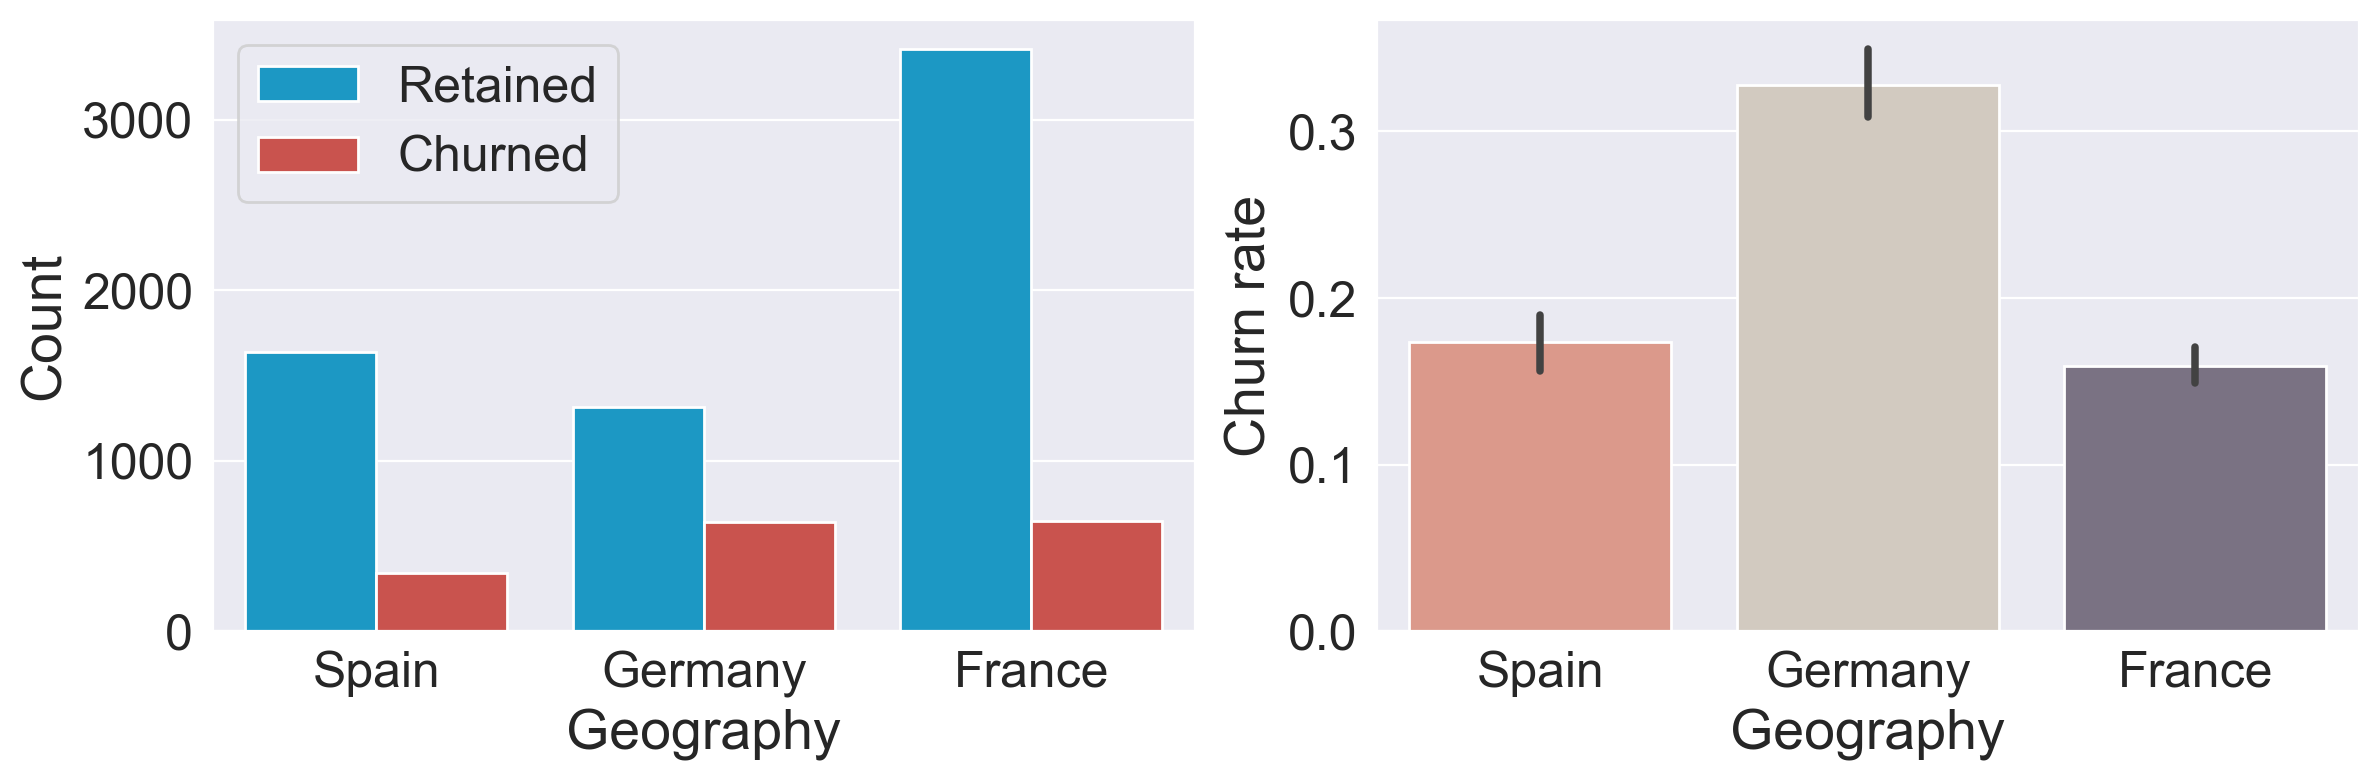

In [21]:
#Biểu đổ + boxplot biểu hiện sự rời bỏ của khách hàng ứng với vị trí địa lý
plot_categorical('Geography')

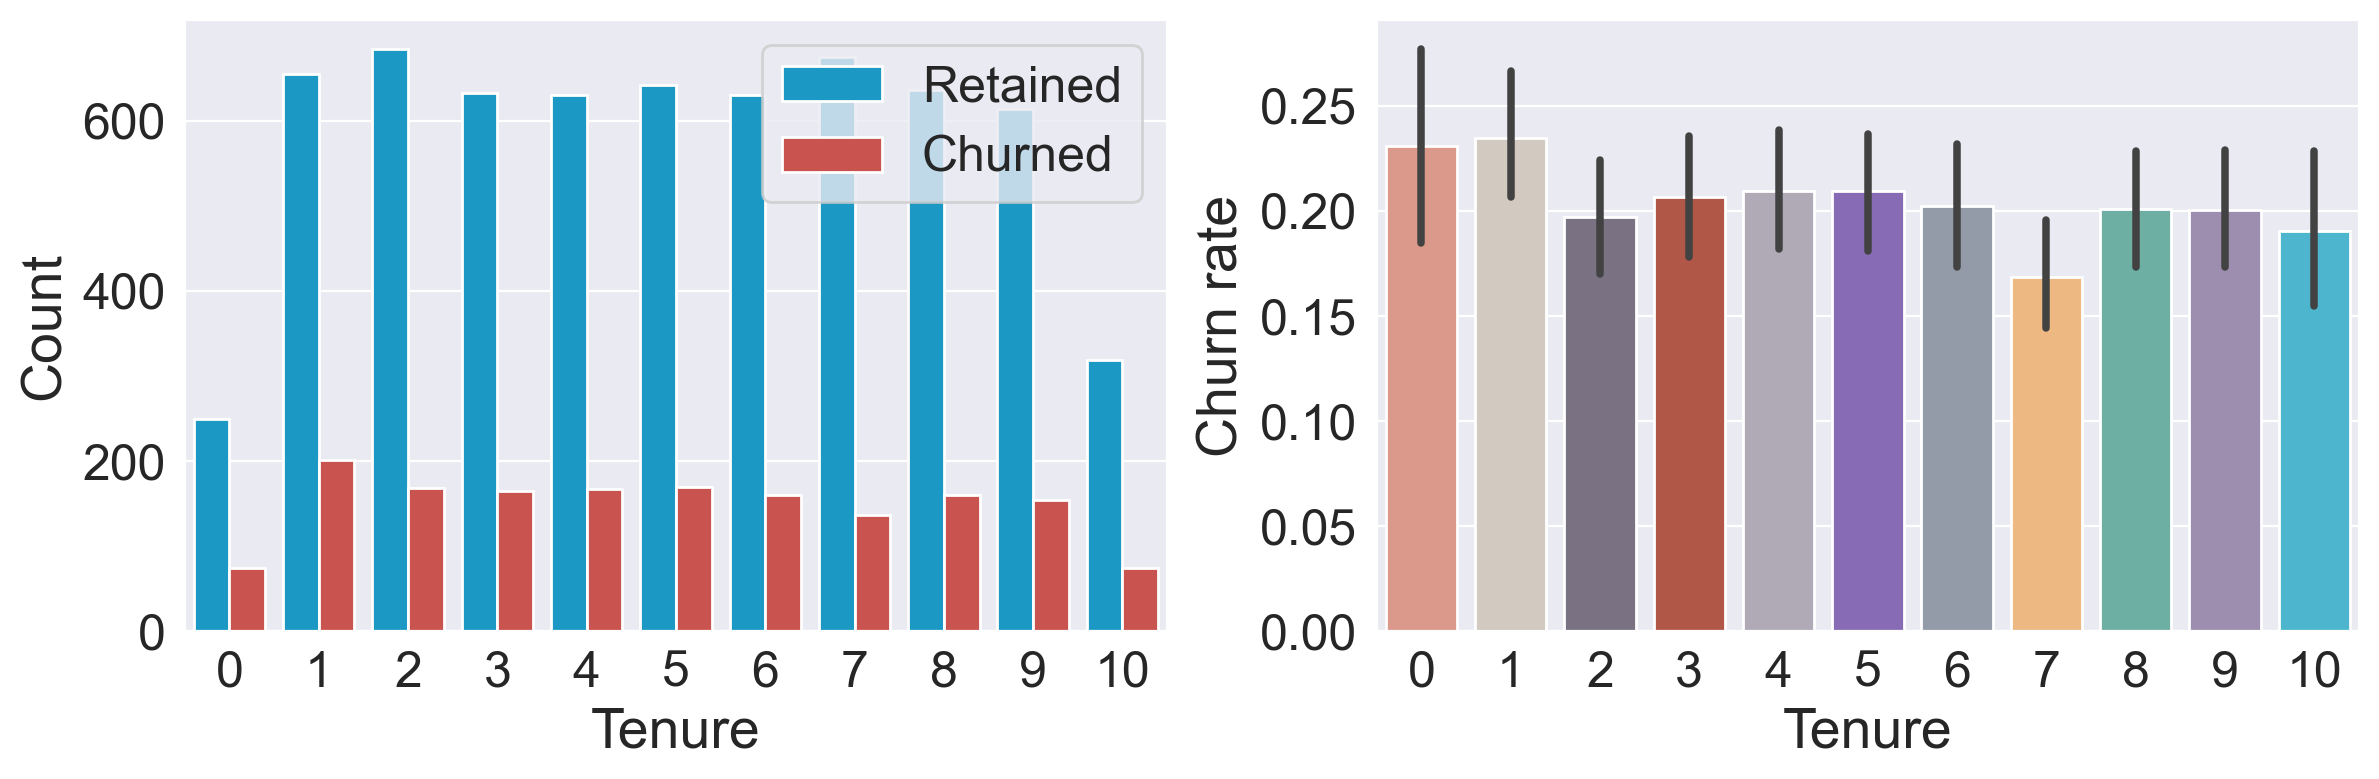

In [22]:
#Biểu đổ + boxplot biểu hiện sự rời bỏ của khách hàng ứng với số nhiệm kỳ khách hàng sử dụng sản phẩm
plot_categorical('Tenure')

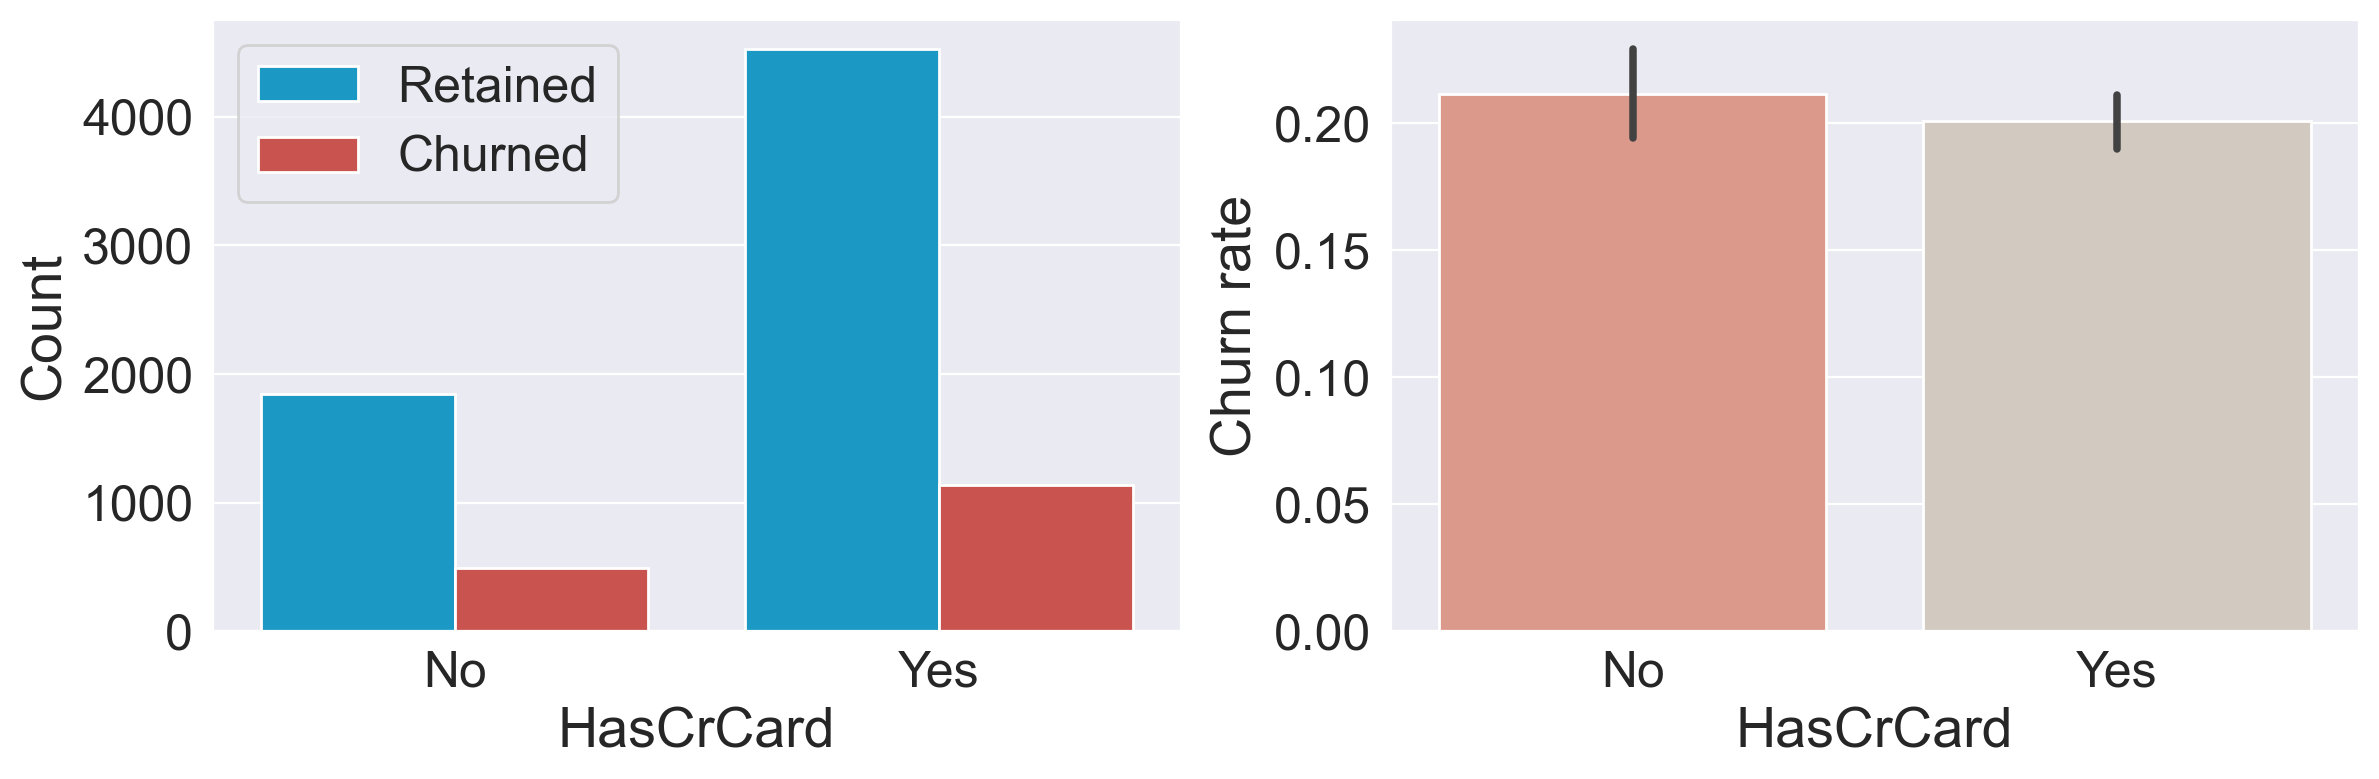

In [23]:
plot_categorical('HasCrCard')


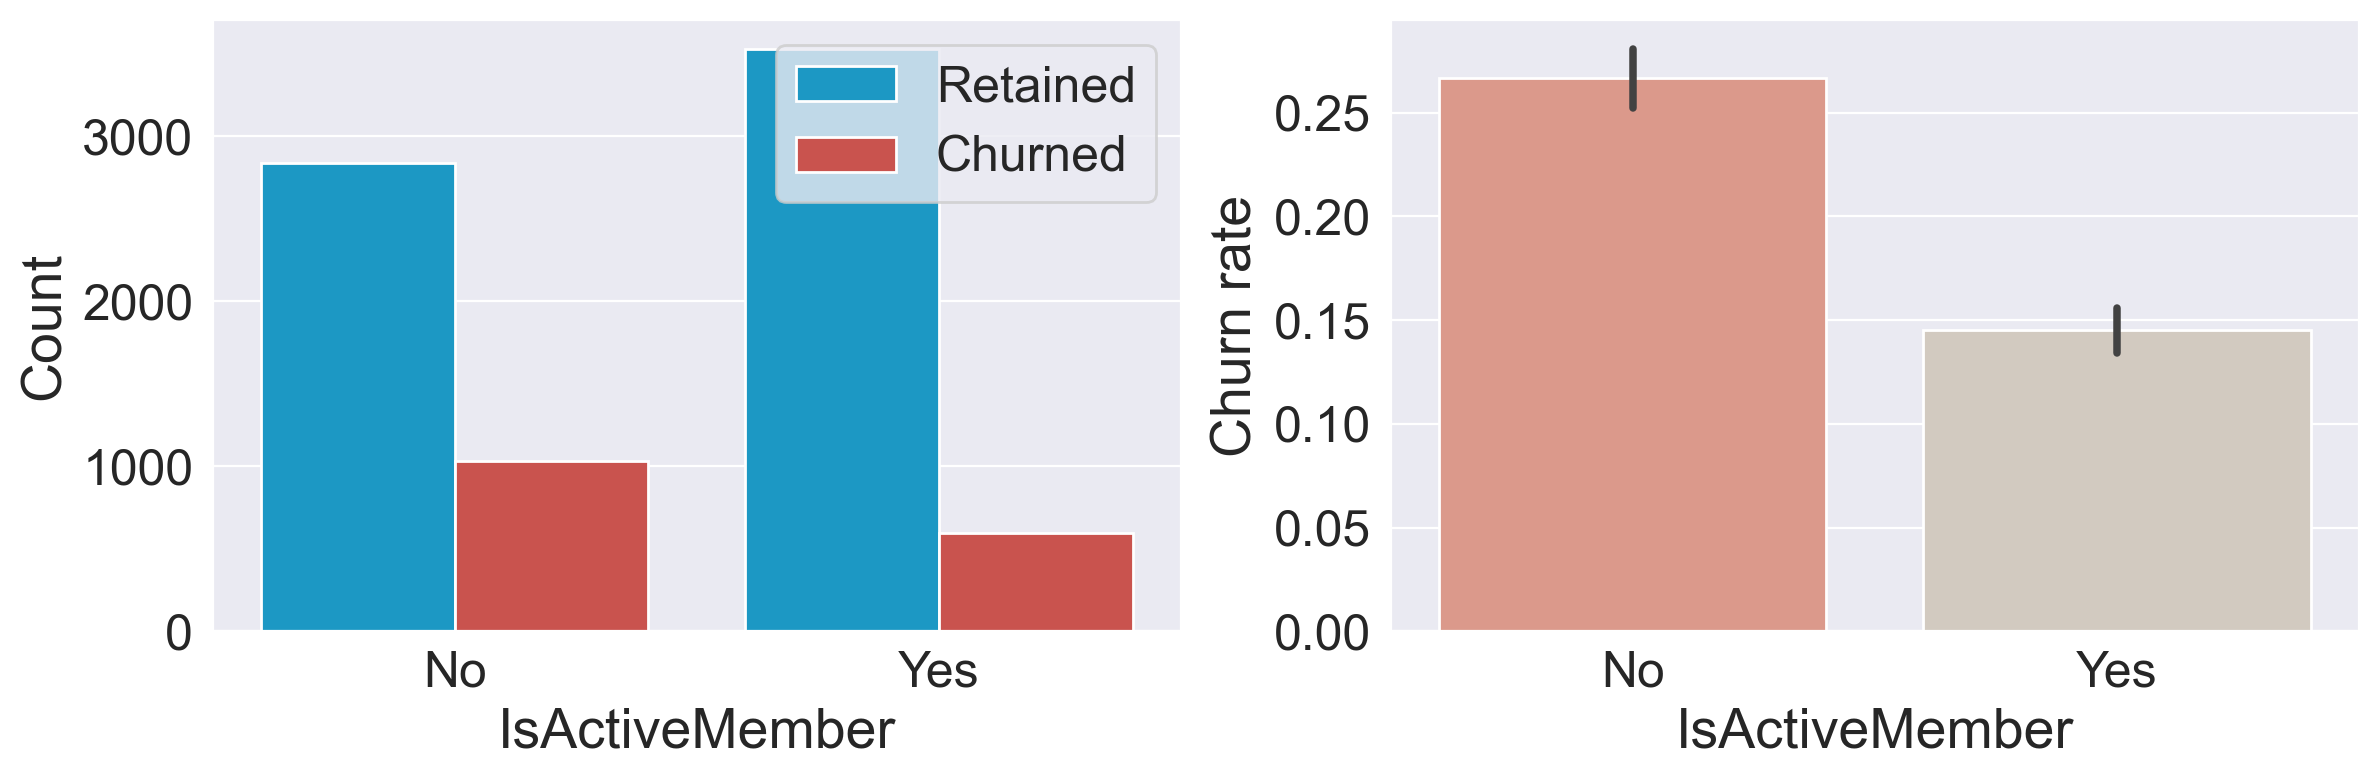

In [24]:
plot_categorical('IsActiveMember')


4. Building Machine Learning Models

In [25]:
X = df.drop(columns = ['Exited'])
y = df['Exited'].values

In [26]:
#Chuyển dữ liệu dạng Categorical về dạng số (0,1)
#Gender
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
#Sử dụng map với Geography
X['Geography'] = X['Geography'].map({'Germany': 0,'Spain': 1,'France': 2})
#Sử dụng StandardScaler đưa các dữ liệu về cùng hệ quy chiếu (đơn vị)
scaler = StandardScaler()
scl_columns = ['CreditScore', 'Age', 'Balance','EstimatedSalary']
X[scl_columns] = scaler.fit_transform(X[scl_columns])


In [45]:
X['Geography'] = pd.to_numeric(X['Geography']) 
X['Gender'] = pd.to_numeric(X['Gender']) 
X.dtypes


CreditScore        float64
Geography            int64
Gender               int32
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

#Creating a Test Set

In [46]:
X

CreditScore  Geography  Gender       Age  Tenure   Balance  \
0       -0.326221          2       0  0.293517       2 -1.225848   
1       -0.440036          1       0  0.198164       1  0.117350   
2       -1.536794          2       0  0.293517       8  1.333053   
3        0.501521          2       0  0.007457       1 -1.225848   
4        2.063884          1       0  0.388871       2  0.785728   
...           ...        ...     ...       ...     ...       ...   
9995     1.246488          2       1  0.007457       5 -1.225848   
9996    -1.391939          2       1 -0.373958      10 -0.306379   
9997     0.604988          2       0 -0.278604       7 -1.225848   
9998     1.256835          0       1  0.293517       3 -0.022608   
9999     1.463771          2       0 -1.041433       4  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                 1          1               1         0.021886  
1                 1          0               1         0.216534  
2                 3          1               0         0.240687  
3                 2          0               0        -0.108918  
4                 1          1               1        -0.365276  
...             ...        ...             ...              ...  
9995              2          1               0        -0.066419  
9996              1          1               1         0.027988  
9997              1          0               1        -1.008643  
9998              2          1               0        -0.125231  
9999              1          1               0        -1.076370  

[10000 rows x 10 columns]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state = 0)

In [29]:
X_test

CreditScore  Geography  Gender       Age  Tenure   Balance  \
9394    -0.553850          0       0 -0.373958       8  0.875323   
898     -1.319512          2       0  0.102810       2  0.424422   
2398     0.573948          1       0  0.293517       8  0.302927   
5906     1.422384          2       1 -0.660018       4  0.570464   
2343     0.573948          0       1 -0.087897       5  1.387129   
...           ...        ...     ...       ...     ...       ...   
1037    -0.264141          2       0 -1.422847       1 -1.225848   
2899    -0.667665          2       0 -0.373958       7 -1.225848   
9549    -0.750439          1       1 -0.278604       1  1.294703   
2740    -0.005471          0       1 -0.469311       4  1.056302   
6690    -0.802173          0       1 -0.850726       8  0.816110   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
9394              1          1               1         1.613046  
898               1          1               0         0.497532  
2398              1          1               1        -0.423561  
5906              1          0               0        -0.186439  
2343              2          1               1         0.618560  
...             ...        ...             ...              ...  
1037              2          1               1         1.406410  
2899              2          1               0        -0.510012  
9549              2          1               0         0.720651  
2740              1          1               1        -1.544383  
6690              1          1               0         1.614749  

[2000 rows x 10 columns]

In [48]:
df.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

In [49]:
plt.figure(figsize=(14,7))
df.corr()['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

<Figure size 1400x700 with 0 Axes>

#LOGISTICREGESSION

In [50]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.22      0.33       405

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



#RandomForestClassifier

In [51]:
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(X_train,y_train)
ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Testing-set Accuracy score is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
y_pred_rf = clf_rf.predict(X_test)
print('Training-set Accuracy score is: ',accuracy_score(y_train,clf_rf.predict(X_train)))
report1 = classification_report(y_test,y_pred_rf)
print(report1)

Testing-set Accuracy score is:  0.8645
Training-set Accuracy score is:  1.0
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.86      0.86      2000



#KNeighborsClassifier

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
report2 = classification_report(y_test,predicted_y)
print(report2)

d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 0.8345
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1595
           1       0.77      0.26      0.39       405

    accuracy                           0.83      2000
   macro avg       0.80      0.62      0.65      2000
weighted avg       0.82      0.83      0.80      2000



d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#GradientBoostingClassifier

In [53]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
report3 = classification_report(y_test,gb_pred)
print(report3)

Gradient Boosting Classifier 0.867
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


5. Reporting
- Với bộ dữ liệu không cân bằng, Accuracy Score có thể không phải là thước đo tốt nhất để đánh giá hiệu suất của mô hình, vì sự phân phối mẫu có thể khác nhau trong tập train. Do đó, số liệu tốt nhất để đánh giá tập dữ liệu mất cân bằng là Recall, f1 Score, ROC curve, v.v.

 - Các kết luận sau đây được rút ra từ việc phân tích:

Giới tính không liên quan đến sự thay đổi của khách hàng.

Những khách hàng người Đức có tỉ lệ rời bỏ cao.

Hầu hết các khách hàng sử dụng 3 đến 4 sản phẩm đã ngừng làm việc với ngân hàng.

Khách hàng trong độ tuổi từ 40 đến 65 có nhiều khả năng rời khỏi ngân hàng hơn.

Những người có điểm tín dụng từ 600 đến 700 có tỷ lệ rời bỏ cao.

Dự đoán đã được thực hiện với tổng số 4 mô hình phân loại. GradientBoosting có chỉ số f1 cao nhất.